# DTSC670: Foundations of Machine Learning Models

## Assignment 8: Polynomial Regression II

#### Name:

### CodeGrade
Please note that this assignment will be manually graded.  **You will have one attempt at submitting this assignment.**

Since we are merely using CodeGrade for this assignment as a platform to manually grade assignments, CodeGrade will not  execute your code for this assignment. Rather, it simply renders your Jupyter Notebook in the web browser. Therefore, any code blocks that generate output must be fully executed within the notebook prior to submission. Otherwise, we will not see the output of your code!

### Details

The purpose of this assignment is expose you to a (second) polynomial regression problem. Your goal is to:

1. Create the following figure using matplotlib, which plots the data from the file called `PolynomialRegressionData_II.csv`.  This figure is generated using the same code that you developed in Assignment 3 of Module 2 - you should reuse that same code.
2. Perform a PolynomialFeatures transformation, then perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="PolynomialDataPlot_III.png" width ="800" />

Below is the second figure you must emulate:

<img src="PolynomialDataPlot_IV.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `PolynomialRegressionData_II.csv`.

In [2]:
import pandas as pd

fileName = "PolynomialRegressionData_II.csv"
data = pd.read_csv('PolynomialRegressionData_II.csv') #importing data from the given file
data.head() #displying the 5 first rows

,x,y,z
0,-3.319120,-4.692237,-3397.468030
1,8.812980,9.128139,17492.040881
2,-19.995425,-19.149264,-169660.383385
3,-7.906697,-8.766213,-17145.826565
4,-14.129764,-13.779218,-63847.758980


In [3]:
# In order to streamline future manipulations, we individually rename each column of the dataset.
xdata = data['x'] 
ydata = data['y']
zdata = data['z']


x = data.drop(['z'], axis=1) 
y = data['z']

# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

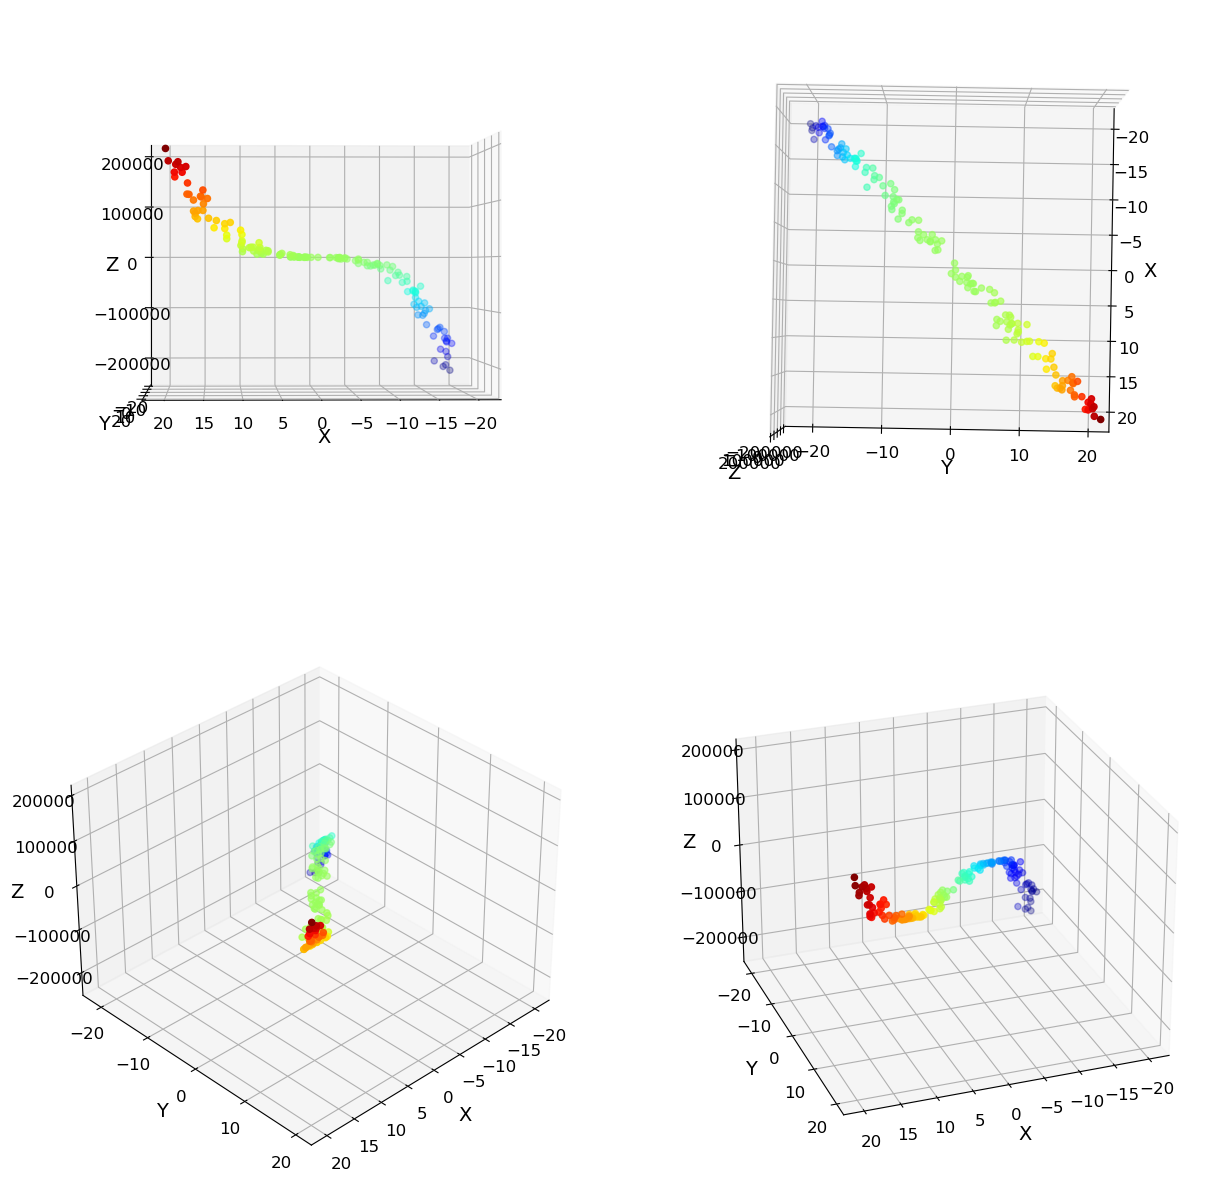

In [4]:
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import Axes3D

#%matplotlib tk 
# allow us to generate an picture of our work
#%matplotlib notebook
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(2,2,1, projection='3d')
ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(0,88)

ax2 = fig.add_subplot(2,2,2, projection='3d')
ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(89, 1)

ax3 = fig.add_subplot(2,2,3, projection='3d')
ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.view_init(34,46)

ax4 = fig.add_subplot(2,2,4, projection='3d')
ax4.scatter3D(xdata, ydata, zdata, c=xdata, cmap='jet')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')
ax4.view_init(26,70)

# Perform Polynomial Features Transformation
Perform a polynomial transformation on your features.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias = False)
X_poly = poly_features.fit_transform(x) # We apply fit_transform methode on our feature x = data.drop(['z'], axis=1) 

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. `x` and `y` will be your training data and `z` will be your response. Print the optimal model parameters to the screen by completing the following `print()` statements.

In [6]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression() 
model.fit(X_poly, y)

# Let print the coef and intercept
print("Model Coefficients: ", model.coef_)   
print("Model Intercept : ", model.intercept_)

Model Coefficients:  [13.11049659 -0.12551237 -0.06438612  0.12522049 -0.06044106 -0.03261149
  0.1003747  -0.10273803 24.03500349]
Model Intercept :  -875.0064816929607


# Create Second Image

Use the following `x_fit` and `y_fit` data to compute `z_fit` by invoking the model's `predict()` method.  This will allow you to plot the line of best fit that is predicted by the model.

In [7]:
# Plot Curve Fit
x_fit = np.linspace(-21,21,1000)
y_fit = x_fit

# We convert x_fit and y_fit to pandas series x and y
x = pd.Series(x_fit) 
y = pd.Series(y_fit)

# We create a dictionary from both series
dct = {
    'x':x,
    'y':y
    }

# We create a pandas dataframe from the dictionary...
xy = pd.DataFrame(dct)

# Lets calculate the X_poly with a combine dataframe of x_fit and y_fit 
# Now, we can fit the model predict on X_poly
X_poly = poly_features.transform(xy)
z_fit = model.predict(X_poly)

Recreate the first image, but plot the line of best fit in each of the subplots as well.

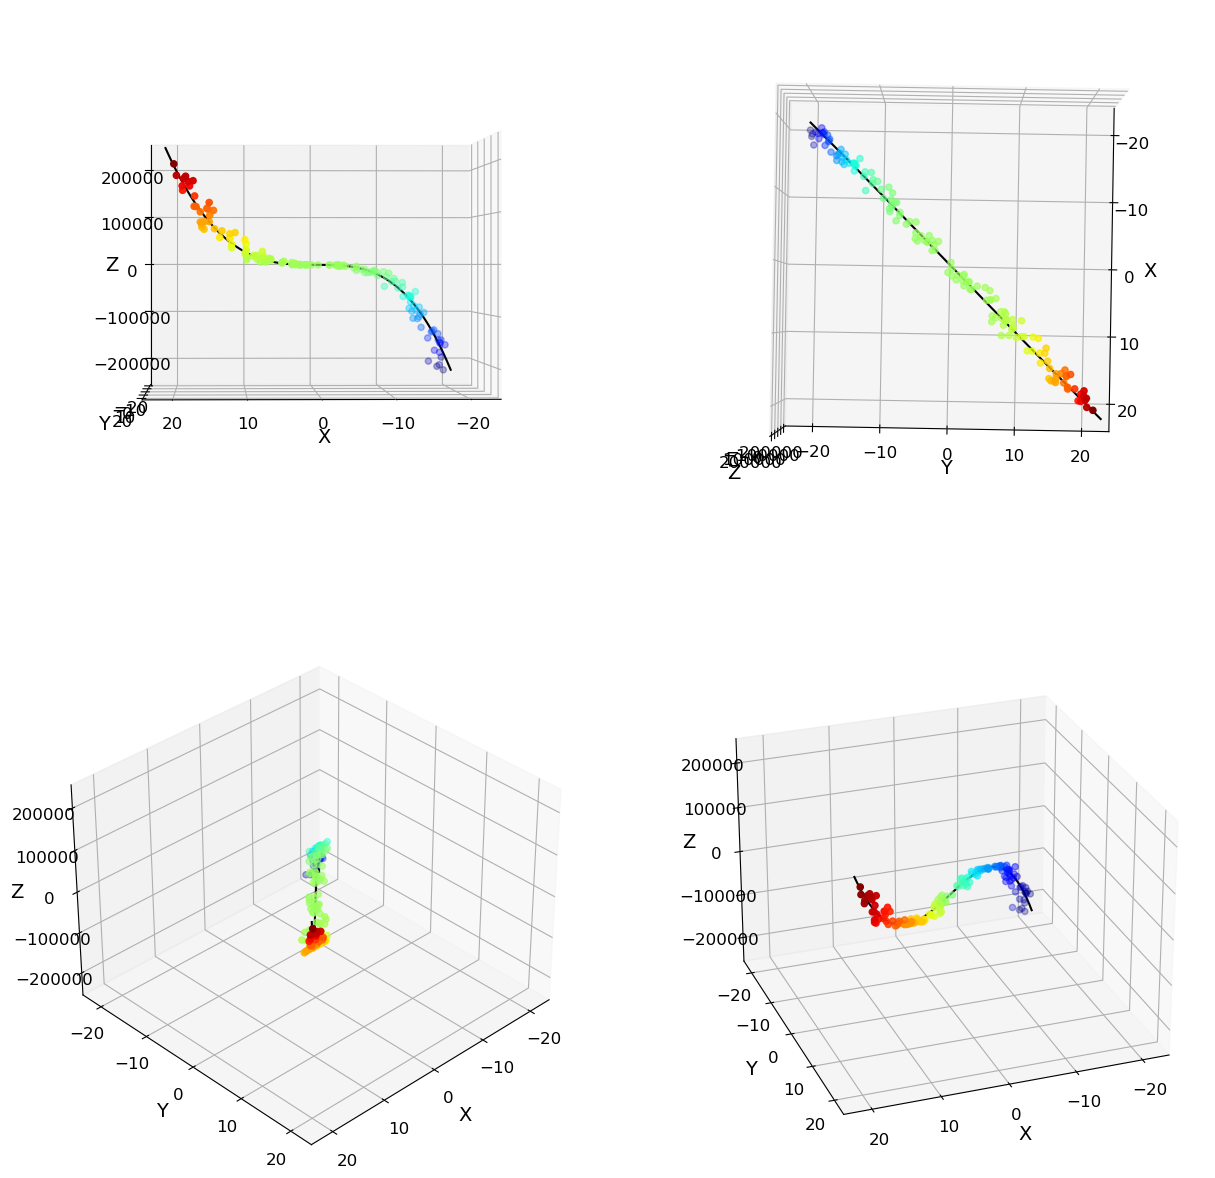

In [8]:
#%matplotlib tk
#%matplotlib notebook
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15,15))


ax1 = fig.add_subplot(2,2,1, projection='3d')
ax1.plot3D(x_fit, y_fit, z_fit, 'black') #this line contains information of the line of fitness for ax1
ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet') 
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(0,88)

ax2 = fig.add_subplot(2,2,2, projection='3d')
ax2.plot3D(x_fit, y_fit, z_fit, 'black') # this line contains information of the line of fitness for ax2
ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(89, 1)

ax3 = fig.add_subplot(2,2,3, projection='3d')
ax3.plot3D(x_fit, y_fit, z_fit, 'black') #this line contains information of the line of fitness for ax3
ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.view_init(34,46)

ax4 = fig.add_subplot(2,2,4, projection='3d')
ax4.plot3D(x_fit, y_fit, z_fit, 'black') #this line contains information of the line of fitness for ax4
ax4.scatter3D(xdata, ydata, zdata, c=xdata, cmap='jet')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')
ax4.view_init(26,70)

# Infer the True Model Parameters

Provided that the true model parameters are **integer values**, you are able to infer the true model parameters by rounding the coefficients and the intercept to the nearest integer value.  You may "hard-code" these values into the below print statements. (See the assignment 3 template for more information)

Use the `get_feature_names()` method of the `PolynomialFeatures` class to be certain of which coefficients you calculated!  You need to report your final answers in a format that is ___abundantly clear___ to me which coefficient corresponds to which ___poly feature___ of the model!  You may add more `print()` statements to accomplish this if you must.

In [9]:
#rounding the coefficients and the intercept to the nearest integer value
print("Model Coefficients: ", np.round(model.coef_))
print("Model Intercept : ", np.round(model.intercept_))

Model Coefficients:  [13. -0. -0.  0. -0. -0.  0. -0. 24.]
Model Intercept :  -875.0


In [10]:
from sklearn.preprocessing import PolynomialFeatures
coefs = PolynomialFeatures()
coefs
#get_feature_names()

PolynomialFeatures()

In [11]:
print("True Model Coefficients: ", "### ENTER CODE HERE ###")
print("True Model Intercept : ", "### ENTER CODE HERE ###")

True Model Coefficients:  ### ENTER CODE HERE ###
True Model Intercept :  ### ENTER CODE HERE ###
